<a href="https://colab.research.google.com/github/amanraula/OPENCODE_WEB-DEVELOPMENT/blob/main/VOTE_SHARE_Contri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Project: Vote Share Prediction**

 **Project Overview:**

Developed an AI/ML model to predict vote share using Random Forest, based on Electronic Voting Machine (EVM) votes and postal votes. The model accurately forecasts the vote distribution among candidates, assisting in early result prediction and analysis.

Why Random Forest:


1.   Random Forest was chosen for its robustness and ability to
     handle large datasets with multiple features.
2.   It reduces overfitting by averaging multiple decision trees, providing high accuracy and stability.
3. This ensemble method also handles both numerical and categorical data, making it ideal for our diverse voting data inputs.




Predict VOTESHARE on basis of EVM votes and POSTAL votes

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
dataset = pd.read_csv('results_2024.csv', header=None)

# Select the relevant columns
X = dataset.iloc[:, [6, 7]]
y = dataset.iloc[:, -1]

# Replace non-numeric placeholders with NaN
X.replace('-', np.nan, inplace=True)
y.replace('-', np.nan, inplace=True)

# Convert columns to numeric where possible
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).flatten())


<ipython-input-3-2dd94ceffe9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 9.366781357116672
R^2 Score: 0.957988869668392


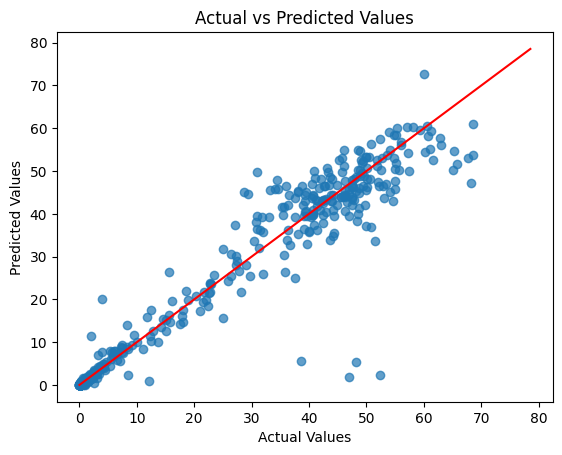

In [6]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line for reference
plt.show()

In [7]:
# Function to predict based on new features
def predict(evms, postal):
    # Impute missing values for each feature separately
    evms_imputed = imputer.transform([[evms]])[0][0]
    postal_imputed = imputer.transform([[postal]])[0][0]

    # Predict based on the imputed features
    prediction = regressor.predict([[evms_imputed, postal_imputed]])
    return prediction[0]

# Example usage
EVM_VOTES = 589
POSTAL = 5
print(f'Prediction for EVM VOTES={EVM_VOTES} and POSTAL={POSTAL}: {predict(EVM_VOTES, POSTAL)}')

Prediction for EVM VOTES=589 and POSTAL=5: 0.05099999999999999


In [8]:
EVM_VOTES =611439
POSTAL = 1531
print(f'Prediction for EVM VOTES={EVM_VOTES} and POSTAL={POSTAL}: {predict(EVM_VOTES, POSTAL)}')

Prediction for EVM VOTES=611439 and POSTAL=1531: 52.871
